In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
print("24BAD052")
print("Kalvi kannan B")

24BAD052
Kalvi kannan B


In [3]:
df = pd.read_csv("auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
X = df[['horsepower']]
y = df['mpg']

In [36]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())


In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


  2    | 13.76 | 3.71 | 0.74
  3    | 13.81 | 3.72 | 0.74
  4    | 14.12 | 3.76 | 0.74


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


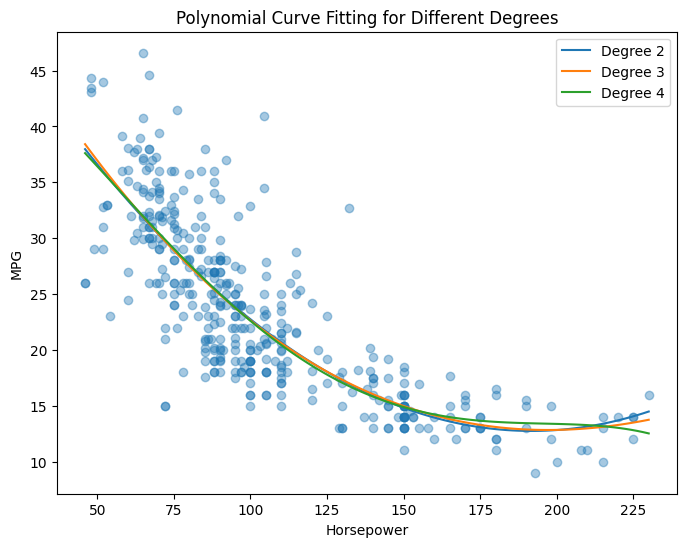

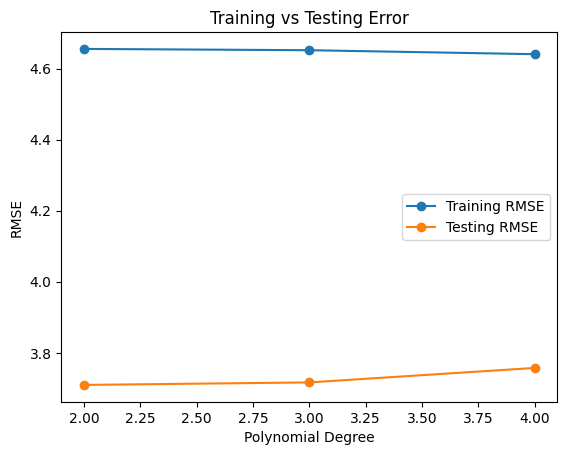

In [47]:
degrees = [2, 3, 4]
train_rmse = []
test_rmse = []
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_test_pred)

    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(rmse)

    print(f"{d:^6} | {mse:.2f} | {rmse:.2f} | {r2:.2f}")

ridge = Ridge(alpha=1.0)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_scaled)
ridge.fit(X_poly, y)

plt.figure(figsize=(8,6))

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_scaled = scaler.transform(X_range)

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X_scaled)

    model = LinearRegression()
    model.fit(X_poly, y)

    X_range_poly = poly.transform(X_range_scaled)
    y_range_pred = model.predict(X_range_poly)

    plt.plot(X_range, y_range_pred, label=f"Degree {d}")

plt.scatter(X, y, alpha=0.4)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Polynomial Curve Fitting for Different Degrees")
plt.legend()
plt.show()

plt.plot(degrees, train_rmse, marker='o', label="Training RMSE")
plt.plot(degrees, test_rmse, marker='o', label="Testing RMSE")
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.title("Training vs Testing Error")
plt.legend()
plt.show()


In [48]:
print("\nOverfitting & Underfitting Analysis:")
for d, tr, te in zip(degrees, train_rmse, test_rmse):
    print(f"Degree {d}: Train RMSE = {tr:.2f}, Test RMSE = {te:.2f}")


Overfitting & Underfitting Analysis:
Degree 2: Train RMSE = 4.66, Test RMSE = 3.71
Degree 3: Train RMSE = 4.65, Test RMSE = 3.72
Degree 4: Train RMSE = 4.64, Test RMSE = 3.76
